Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

## Bank Marketing Data Set

Os dados referem-se a campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente, para acessar se o produto (depósito bancário a prazo) seria ('sim') ou não ('não') subscrito.

Link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Importação das Bibliotecas

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV

### Descrição das features

  - 1 - **age**: Idade
  - 2 - **job**: Tipo de trabalho
  - 3 - **marital**: Estado civil
  - 4 - **education**: Escolaridade
  - 5 - **default**: Tem crédito inadimplente? 
  - 6 - **housing**: Tem empréstimo habitacional? 
  - 7 - **loan**: Tem empréstimo pessoal? 
  - 8 - **contact**: Meio de comunicação 
  - 9 - **month**: Último contato mês do ano 
  - 10 - **day**: Último dia de contato
  - 11 - **duration**: Duração do último contato, em segundos .
  - 12 - **campaign**: Número de contatos realizados durante este anúncio de campanha para este cliente 
  - 13 - **pdays**:  Número de dias que se passaram depois que o cliente foi contatado pela última vez em uma campanha anterior
  - 14 - **previous**: Número de contatos realizados antes desta campanha e para este cliente
  - 15 - **poutcome**: Resultado da campanha de marketing anterior
  - 16 - **y**: O cliente subscreveu um depósito a prazo?

### Leitura dos dados

In [67]:
df = pd.read_csv('bank-full.csv', sep=';')

### Visão parcial dos dados

In [68]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15356,31,management,single,tertiary,no,3142,yes,no,cellular,18,jul,164,1,-1,0,unknown,no
1678,34,blue-collar,married,secondary,no,286,yes,no,unknown,9,may,134,2,-1,0,unknown,no
15148,41,management,married,tertiary,no,49,yes,no,cellular,17,jul,312,5,-1,0,unknown,no
15572,26,services,single,secondary,no,3,no,yes,cellular,21,jul,140,4,-1,0,unknown,no
16878,37,technician,single,tertiary,no,2642,yes,no,cellular,25,jul,591,3,-1,0,unknown,no


### Dimensão do dataset

In [69]:
df.shape

(45211, 17)

### Estatísticas Básicas

In [70]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Informações extras

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Distribuição da classe

In [72]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

### Valores Faltantes

In [73]:
df.replace('unknown', np.nan, inplace=True)
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

### Remoção de features

As features ```poutcome``` e ```contact``` são removidas por possuir uma quantidade muita alta de valores desconhecidos.

Porcentagem de dados desconhecidos:

- poutcome: 81.7%
- Contact: 28.8%

A feature ``` duration ``` é removida por se tratar de uma feature que enviesa o resultado da predição.

In [74]:
df.drop(['poutcome', 'contact', 'duration'], axis=1, inplace=True)

### Selecionando Variáveis

In [75]:
# variáveis categóricas
features_discr = df.select_dtypes('object').columns[:-1]

# variáveis numéricas
features_num = df.select_dtypes('int').columns

In [76]:
features_num

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

In [77]:
features_discr

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month'], dtype='object')

## Visualização Gráfica

### Dados Categóricos

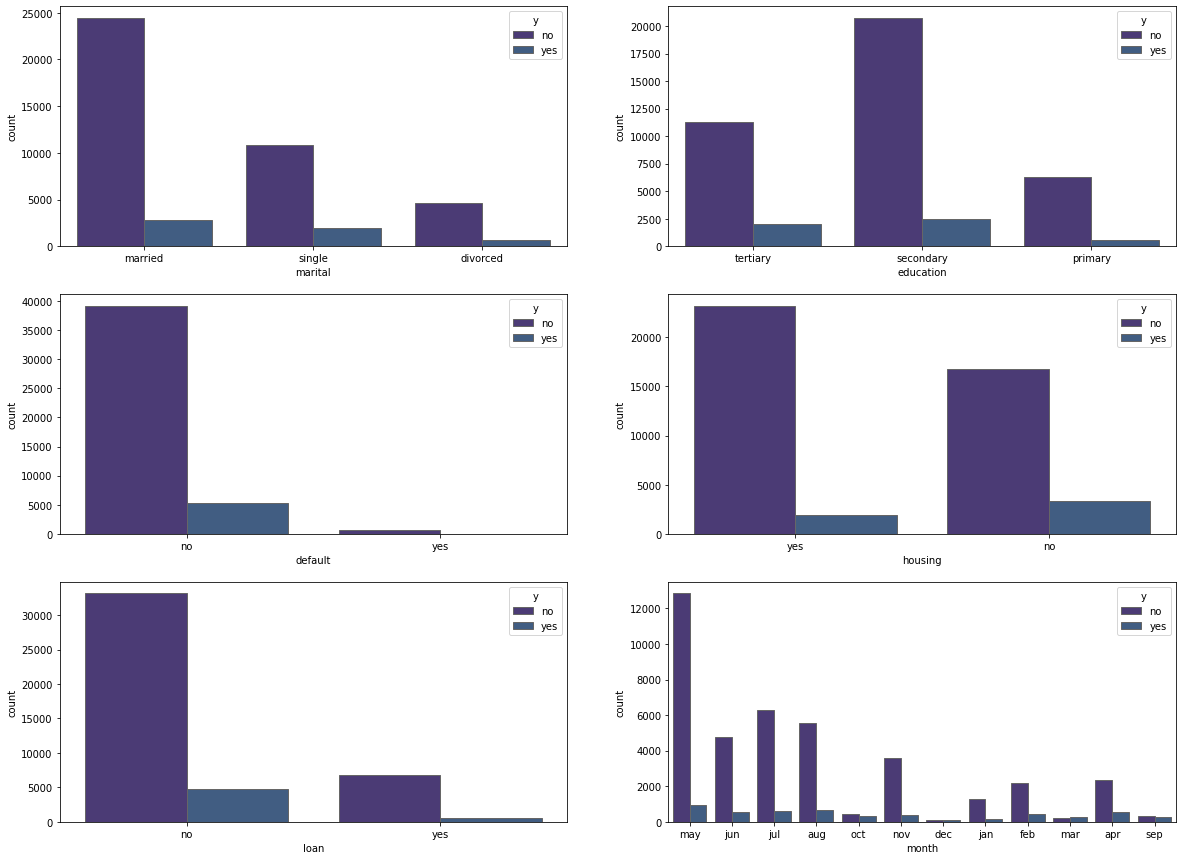

In [78]:
fig, ((ax1, ax2), (ax3 , ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))


sns.set_palette('viridis')

sns.countplot(x='marital', hue='y',data=df, ax=ax1, edgecolor='0.4');
sns.countplot(x='education', hue='y',data=df,ax=ax2, edgecolor='0.4');
sns.countplot(x='default', hue='y',data=df, ax=ax3, edgecolor='0.4');
sns.countplot(x='housing', hue='y',data=df, ax=ax4, edgecolor='0.4');
sns.countplot(x='loan', hue='y',data=df, ax=ax5, edgecolor='0.4');
sns.countplot(x='month', hue='y',data=df, ax=ax6, edgecolor='0.4');


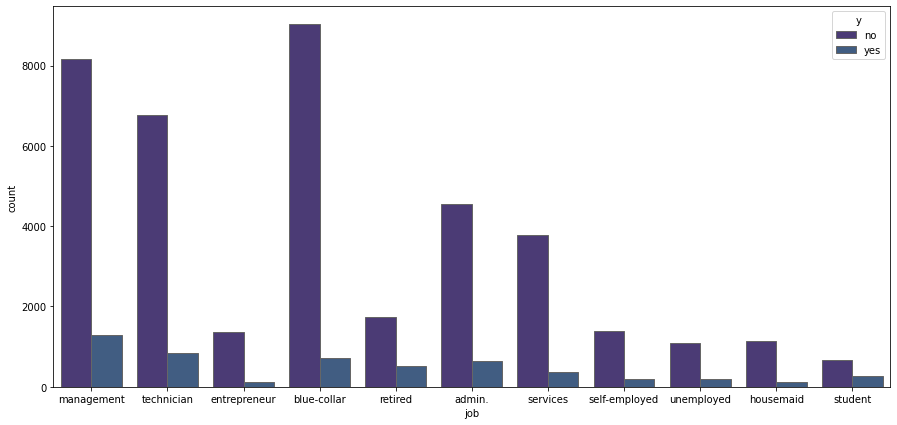

In [79]:
plt.figure(figsize=(15, 7))
sns.countplot(x='job', hue='y',data=df, edgecolor='0.4');

## Distribuição Numérica

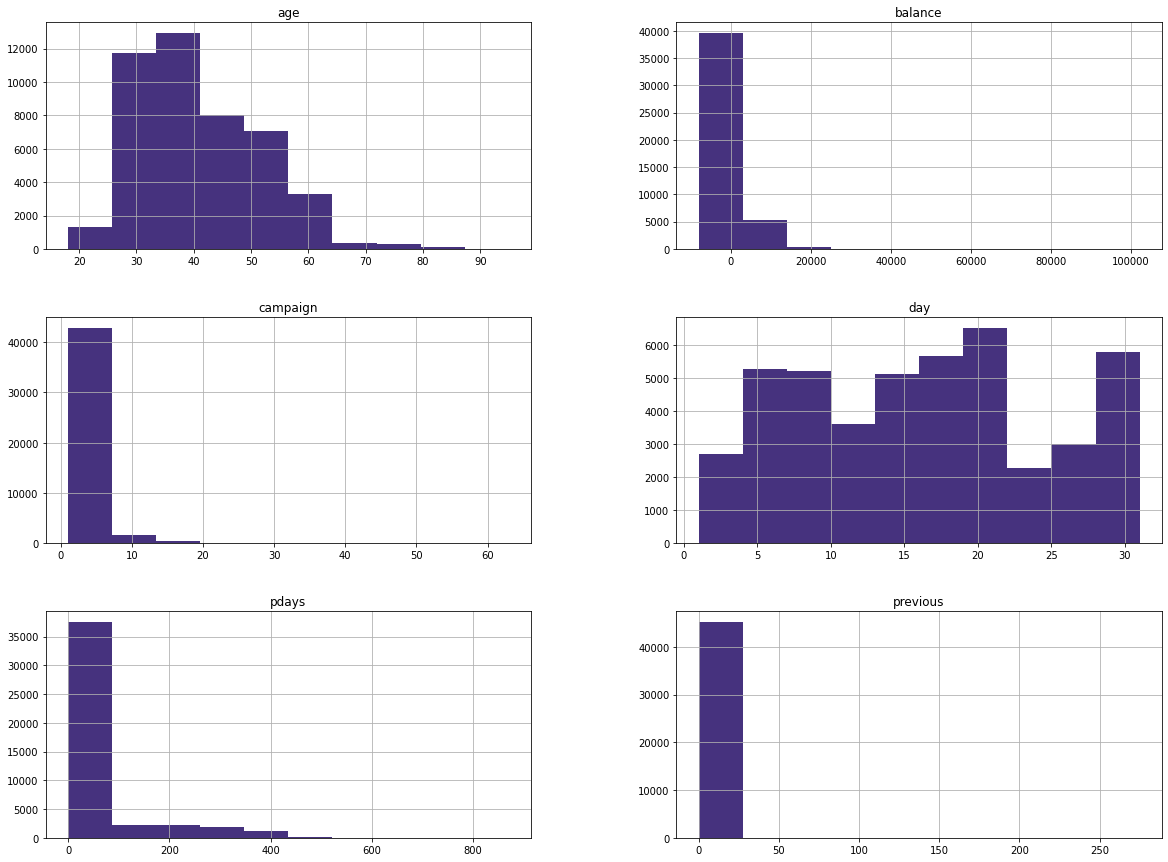

In [80]:
df[features_num].hist(figsize=(20, 15), bins=10);

### Relação entre a variável alvo e os valores numéricos

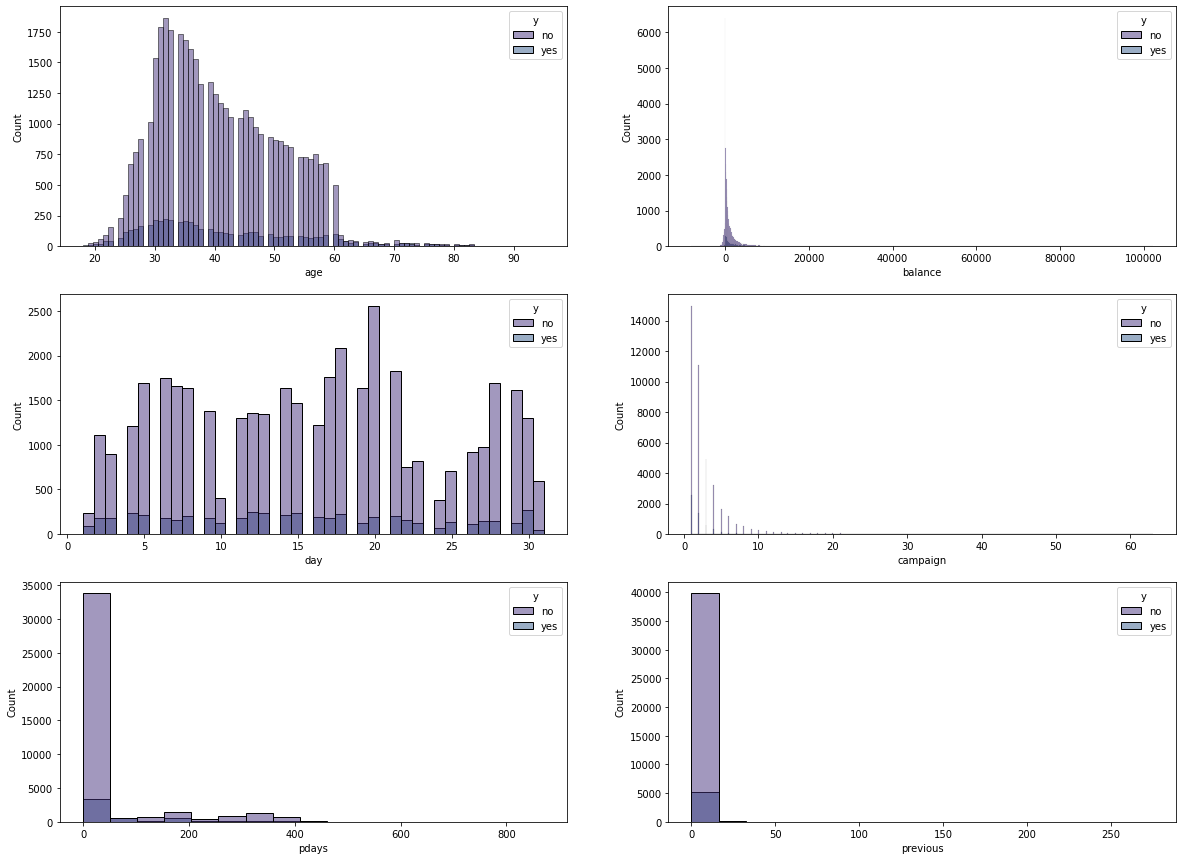

In [81]:
fig, ((ax1, ax2), (ax3 , ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(df, x=features_num[0], hue='y', ax=ax1);
sns.histplot(df, x=features_num[1], hue='y', ax=ax2);
sns.histplot(df, x=features_num[2], hue='y', ax=ax3);
sns.histplot(df, x=features_num[3], hue='y', ax=ax4);
sns.histplot(df, x=features_num[4], hue='y', ax=ax5);
sns.histplot(df, x=features_num[5], hue='y', ax=ax6);

### Imputação dos valores faltantes

In [82]:
impute = SimpleImputer(strategy='most_frequent')

df[['job', 'education']] = impute.fit_transform(df[['job', 'education']])

### Conversão

In [83]:
map_replace = {'marital' : {'single' : 0, 'married' : 1, 'divorced' : 2},
 'default' : {'no' : 0, 'yes' : 1},
 'housing' : {'no' : 0, 'yes' : 1}, 
 'education' : {'primary' : 0, 'secondary' : 1, 'tertiary' : 2}, 
 'loan' : {'no' : 0, 'yes' : 1},
 'y' : {'no' : 0,  'yes' : 1}
}

df.replace(map_replace, inplace=True)

In [84]:
df = pd.get_dummies(df, columns=['job', 'month'])
df.head()

,age,marital,education,default,balance,housing,loan,day,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1,2,0,2143,1,0,5,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,0,1,0,29,1,0,5,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,1,1,0,2,1,1,5,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,47,1,1,0,1506,1,0,5,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,1,0,0,5,1,-1,...,0,0,0,0,0,0,1,0,0,0


### Smote 

Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.

In [85]:
smote = SMOTE()

X = df.drop('y', axis=1).values
y = df.loc[:, 'y'].values

X, y = smote.fit_resample(X, y)

In [86]:
np.bincount(y)

array([39922, 39922])

### Divisão dos dados em treino e teste

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

### Escalonamento

In [89]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Avaliação dos modelos

O dicionário abaixo vai guardar os modelos utilizados e suas  avaliações.

In [90]:
modelos_aval = {'Modelo' : [], 'Acurácia' : [], 'Precisão' : [], 'Revocação' : []}

## KNN

In [91]:
knn = KNeighborsClassifier()

params = {'n_neighbors' : range(2, 11),
         'weights': ['uniform', 'distance']}

grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 11),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

#### Melhor estimador

In [92]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=10, weights='distance')

### Avaliação

In [93]:
def aval_func(y_pred, y_test, model):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    modelos_aval['Modelo'].append(model)
    modelos_aval['Acurácia'].append(acc)
    modelos_aval['Precisão'].append(prec)
    modelos_aval['Revocação'].append(rec)
    
    print(f'Acurácia: {acc}\nPrecisão: {prec}\nRecall: {rec}')

In [94]:
knn_f = grid.best_estimator_
y_pred = knn_f.predict(X_test)

aval_func(y_pred, y_test, 'KNN')

Acurácia: 0.707147031810971
Precisão: 0.6894760959217963
Recall: 0.7537780746430659


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69     11977
           1       0.69      0.75      0.72     11977

    accuracy                           0.71     23954
   macro avg       0.71      0.71      0.71     23954
weighted avg       0.71      0.71      0.71     23954



## Decision-Tree

In [96]:
tree = DecisionTreeClassifier()

params = {'max_depth' : range(2, 11)}

grid = GridSearchCV(tree, params, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 11)}, scoring='accuracy')

#### Melhor estimador

In [97]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10)

### Avaliação

In [98]:
tree_f = grid.best_estimator_
y_pred = tree_f.predict(X_test)

aval_func(y_pred, y_test, 'DECISION TREE')

Acurácia: 0.6449862235952242
Precisão: 0.6846751036903116
Recall: 0.5375302663438256


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     11977
           1       0.68      0.54      0.60     11977

    accuracy                           0.64     23954
   macro avg       0.65      0.64      0.64     23954
weighted avg       0.65      0.64      0.64     23954



## Logistic Regression

In [100]:
log = LogisticRegression()

params = { 'penalty' : ['l1', 'l2', 'elasticnet'],
           'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = GridSearchCV(log, params, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

#### Melhor estimador

In [101]:
grid.best_estimator_

LogisticRegression(solver='sag')

### Avaliação

In [102]:
log_f = grid.best_estimator_
y_pred = log_f.predict(X_test)

aval_func(y_pred, y_test, 'LOGISTIC REGRESSION')

Acurácia: 0.5975619938214912
Precisão: 0.6548707753479125
Recall: 0.4125407030141104


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66     11977
           1       0.65      0.41      0.51     11977

    accuracy                           0.60     23954
   macro avg       0.61      0.60      0.58     23954
weighted avg       0.61      0.60      0.58     23954



## Perceptron 

In [104]:
perceptron = Perceptron()

params = {'eta0' : [0.0001, 0.001, 0.01, 0.1, 1.0]}

grid = GridSearchCV(perceptron, params, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(), n_jobs=-1,
             param_grid={'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='accuracy')

#### Melhor estimador

In [105]:
grid.best_estimator_

Perceptron(eta0=0.0001)

### Avaliação

In [106]:
per_f = grid.best_estimator_
y_pred = per_f.predict(X_test)

aval_func(y_pred, y_test, 'PERCEPTRON')

Acurácia: 0.46702012190030895
Precisão: 0.4752599273456094
Recall: 0.6335476329631794


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.30      0.36     11977
           1       0.48      0.63      0.54     11977

    accuracy                           0.47     23954
   macro avg       0.46      0.47      0.45     23954
weighted avg       0.46      0.47      0.45     23954



## Resultados

In [108]:
df_modelos = pd.DataFrame(modelos_aval)

### Acurácia

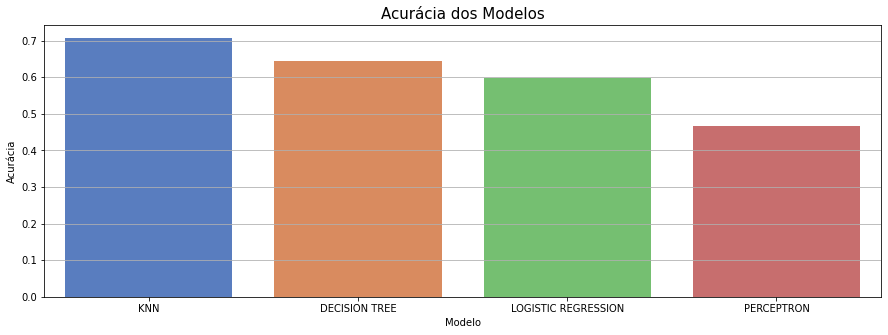

In [109]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('Acurácia dos Modelos', fontsize=15)
sns.barplot(x='Modelo', y='Acurácia', data=df_modelos, palette='muted');

### Precisão

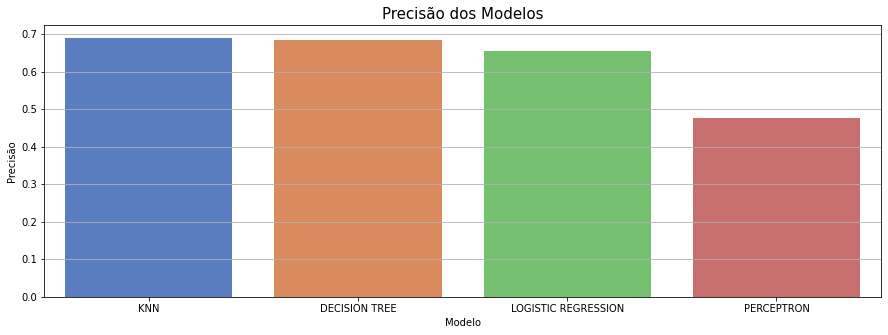

In [110]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('Precisão dos Modelos', fontsize=15)
sns.barplot(x='Modelo', y='Precisão', data=df_modelos, palette='muted');

### Revocação

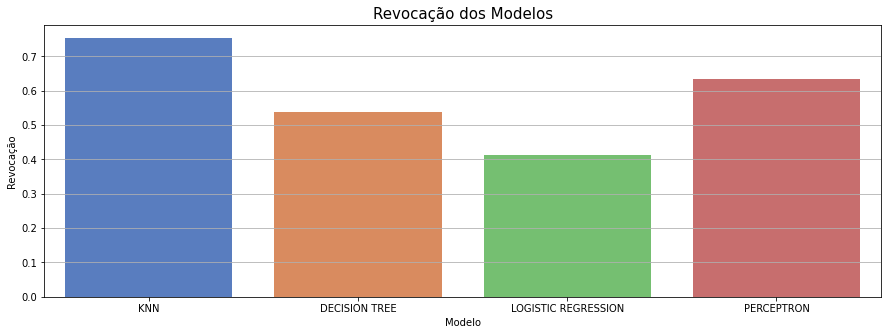

In [111]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('Revocação dos Modelos', fontsize=15)
sns.barplot(x='Modelo', y='Revocação', data=df_modelos, palette='muted');